In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [56]:
df = pd.read_csv('train.csv')

In [57]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [59]:
model_df = df.drop(columns = ['Product_ID'])

In [60]:
model_df.fillna(value = 0.0, inplace = True)

In [61]:
model_df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [62]:
model_df['Product_Category_1']=model_df['Product_Category_1'].astype(float)

In [63]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null float64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 46.2+ MB


In [64]:
model_df.head(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3.0,0.0,0.0,8370
1,1000001,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12.0,0.0,0.0,1422
3,1000001,F,0-17,10,A,2,0,12.0,14.0,0.0,1057
4,1000002,M,55+,16,C,4+,0,8.0,0.0,0.0,7969
5,1000003,M,26-35,15,A,3,0,1.0,2.0,0.0,15227
6,1000004,M,46-50,7,B,2,1,1.0,8.0,17.0,19215
7,1000004,M,46-50,7,B,2,1,1.0,15.0,0.0,15854
8,1000004,M,46-50,7,B,2,1,1.0,16.0,0.0,15686
9,1000005,M,26-35,20,A,1,1,8.0,0.0,0.0,7871


In [65]:
purchase_avg = round(model_df.groupby('User_ID')['Purchase'].mean(),2)
purchase_avg = pd.DataFrame(purchase_avg)
purchase_avg.reset_index(inplace = True)
purchase_avg

,User_ID,Purchase
0,1000001,9545.51
1,1000002,10525.61
2,1000003,11780.52
3,1000004,14747.71
4,1000005,7745.29
...,...,...
5886,1006036,8007.89
5887,1006037,9176.54
5888,1006038,7502.83
5889,1006039,7977.28


In [66]:
product_1_avg = round(model_df.groupby('User_ID')['Product_Category_1'].mean())
product_1_avg = pd.DataFrame(product_1_avg)
product_1_avg.reset_index(inplace = True)
product_1_avg

,User_ID,Product_Category_1
0,1000001,6.0
1,1000002,5.0
2,1000003,3.0
3,1000004,2.0
4,1000005,6.0
...,...,...
5886,1006036,6.0
5887,1006037,8.0
5888,1006038,7.0
5889,1006039,6.0


In [67]:
product_2_avg = round(model_df.groupby('User_ID')['Product_Category_2'].mean())
product_2_avg = pd.DataFrame(product_2_avg)
product_2_avg.reset_index(inplace = True)
product_2_avg

,User_ID,Product_Category_2
0,1000001,4.0
1,1000002,7.0
2,1000003,4.0
3,1000004,7.0
4,1000005,6.0
...,...,...
5886,1006036,7.0
5887,1006037,7.0
5888,1006038,8.0
5889,1006039,8.0


In [68]:
product_3_avg = round(model_df.groupby('User_ID')['Product_Category_3'].mean())
product_3_avg = pd.DataFrame(product_3_avg)
product_3_avg.reset_index(inplace = True)
product_3_avg

,User_ID,Product_Category_3
0,1000001,4.0
1,1000002,5.0
2,1000003,5.0
3,1000004,9.0
4,1000005,2.0
...,...,...
5886,1006036,3.0
5887,1006037,4.0
5888,1006038,4.0
5889,1006039,4.0


In [69]:
model_df.drop_duplicates(subset='User_ID', inplace = True)

In [70]:
model_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3.0,0.0,0.0,8370
4,1000002,M,55+,16,C,4+,0,8.0,0.0,0.0,7969
5,1000003,M,26-35,15,A,3,0,1.0,2.0,0.0,15227
6,1000004,M,46-50,7,B,2,1,1.0,8.0,17.0,19215
9,1000005,M,26-35,20,A,1,1,8.0,0.0,0.0,7871


In [71]:
model_df= model_df.merge(product_1_avg, on = 'User_ID')
model_df= model_df.merge(product_2_avg, on = 'User_ID')
model_df= model_df.merge(product_3_avg, on = 'User_ID')
model_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1_x,Product_Category_2_x,Product_Category_3_x,Purchase,Product_Category_1_y,Product_Category_2_y,Product_Category_3_y
0,1000001,F,0-17,10,A,2,0,3.0,0.0,0.0,8370,6.0,4.0,4.0
1,1000002,M,55+,16,C,4+,0,8.0,0.0,0.0,7969,5.0,7.0,5.0
2,1000003,M,26-35,15,A,3,0,1.0,2.0,0.0,15227,3.0,4.0,5.0
3,1000004,M,46-50,7,B,2,1,1.0,8.0,17.0,19215,2.0,7.0,9.0
4,1000005,M,26-35,20,A,1,1,8.0,0.0,0.0,7871,6.0,6.0,2.0


In [72]:
model_df.drop(columns = ['Product_Category_1_y','Product_Category_2_y','Product_Category_3_y','Product_Category_1_x',
                         'Product_Category_2_x','Product_Category_3_x','Purchase'], inplace = True)
model_df = model_df.merge(purchase_avg, on = 'User_ID')
model_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,9545.51
1,1000002,M,55+,16,C,4+,0,10525.61
2,1000003,M,26-35,15,A,3,0,11780.52
3,1000004,M,46-50,7,B,2,1,14747.71
4,1000005,M,26-35,20,A,1,1,7745.29


In [73]:
model_df.rename(columns = {'Product_Category_1':'avg_product_1_value','Product_Category_2':'avg_product_2_value',
                           'Product_Category_3':'avg_product_3_value','Purchase':'avg_purchase'}, inplace = True)
model_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,avg_purchase
0,1000001,F,0-17,10,A,2,0,9545.51
1,1000002,M,55+,16,C,4+,0,10525.61
2,1000003,M,26-35,15,A,3,0,11780.52
3,1000004,M,46-50,7,B,2,1,14747.71
4,1000005,M,26-35,20,A,1,1,7745.29


In [74]:
model_df.drop_duplicates(subset = 'User_ID',inplace = True)
model_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,avg_purchase
0,1000001,F,0-17,10,A,2,0,9545.51
1,1000002,M,55+,16,C,4+,0,10525.61
2,1000003,M,26-35,15,A,3,0,11780.52
3,1000004,M,46-50,7,B,2,1,14747.71
4,1000005,M,26-35,20,A,1,1,7745.29


In [75]:
dummy_df = pd.get_dummies(model_df, drop_first=True)
dummy_df.head()

,User_ID,Occupation,Marital_Status,avg_purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,9545.51,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000002,16,0,10525.61,1,0,0,0,0,0,1,0,1,0,0,0,1
2,1000003,15,0,11780.52,1,0,1,0,0,0,0,0,0,0,0,1,0
3,1000004,7,1,14747.71,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1000005,20,1,7745.29,1,0,1,0,0,0,0,0,0,1,0,0,0


In [76]:
dummy_df.shape

(5891, 17)

In [77]:
dummy_df.head()

,User_ID,Occupation,Marital_Status,avg_purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,9545.51,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000002,16,0,10525.61,1,0,0,0,0,0,1,0,1,0,0,0,1
2,1000003,15,0,11780.52,1,0,1,0,0,0,0,0,0,0,0,1,0
3,1000004,7,1,14747.71,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1000005,20,1,7745.29,1,0,1,0,0,0,0,0,0,1,0,0,0


In [78]:
dummy_df.shape

(5891, 17)

In [79]:
print(min(dummy_df['avg_purchase']))
print(max(dummy_df['avg_purchase']))

2318.73
18577.89


In [80]:
new_avgs = []
for value in dummy_df['avg_purchase']:
        if value < 3300:
            new_avgs.append(0)
            continue
        elif value < 4300:
            new_avgs.append(1)
            continue
        elif value < 5300:
            new_avgs.append(2)
            continue
        elif value < 6300:
            new_avgs.append(3)
            continue
        elif value < 7300:
            new_avgs.append(4)
            continue
        elif value < 8300:
            new_avgs.append(5)
            continue
        elif value < 9300:
            new_avgs.append(6)
            continue
        elif value < 10300:
            new_avgs.append(7)
            continue
        elif value < 11300:
            new_avgs.append(8)
            continue
        elif value < 12300:
            new_avgs.append(9)
            continue
        elif value < 13300:
            new_avgs.append(10)
            continue
        elif value < 14300:
            new_avgs.append(11)
            continue
        elif value < 15300:
            new_avgs.append(12)
            continue
        elif value < 16300:
            new_avgs.append(13)
            continue
        elif value < 17300:
            new_avgs.append(14)
            continue
        elif value < 18300:
            new_avgs.append(15)
            continue
        elif value < 19300:
            new_avgs.append(16)
            continue

In [81]:
new_avgs

[7,
 8,
 9,
 12,
 5,
 5,
 11,
 8,
 7,
 7,
 5,
 8,
 9,
 7,
 6,
 4,
 10,
 8,
 7,
 6,
 5,
 7,
 7,
 9,
 4,
 8,
 6,
 11,
 6,
 5,
 7,
 6,
 5,
 5,
 9,
 5,
 7,
 6,
 9,
 7,
 7,
 3,
 4,
 7,
 5,
 9,
 5,
 5,
 10,
 9,
 5,
 7,
 4,
 8,
 5,
 5,
 5,
 6,
 6,
 10,
 11,
 8,
 7,
 5,
 6,
 5,
 7,
 6,
 8,
 8,
 7,
 9,
 4,
 4,
 5,
 8,
 9,
 8,
 7,
 10,
 5,
 9,
 8,
 7,
 5,
 7,
 6,
 4,
 8,
 4,
 8,
 8,
 8,
 5,
 8,
 14,
 5,
 13,
 13,
 5,
 6,
 6,
 8,
 8,
 7,
 11,
 7,
 5,
 8,
 7,
 8,
 5,
 8,
 12,
 8,
 6,
 6,
 11,
 8,
 9,
 8,
 12,
 13,
 6,
 5,
 6,
 6,
 6,
 4,
 7,
 13,
 8,
 7,
 6,
 7,
 4,
 7,
 9,
 8,
 9,
 6,
 6,
 4,
 6,
 5,
 4,
 6,
 7,
 10,
 7,
 6,
 7,
 10,
 3,
 8,
 7,
 6,
 10,
 11,
 11,
 7,
 11,
 6,
 5,
 10,
 5,
 4,
 6,
 8,
 6,
 8,
 8,
 11,
 8,
 6,
 7,
 7,
 4,
 6,
 6,
 4,
 7,
 9,
 6,
 7,
 6,
 6,
 6,
 6,
 3,
 7,
 8,
 7,
 7,
 3,
 12,
 8,
 7,
 5,
 12,
 5,
 8,
 5,
 5,
 8,
 4,
 8,
 6,
 6,
 7,
 8,
 5,
 8,
 9,
 5,
 7,
 7,
 7,
 9,
 5,
 6,
 7,
 7,
 6,
 5,
 8,
 4,
 6,
 8,
 7,
 7,
 10,
 6,
 6,
 8,
 13,
 10,
 8,
 8,
 10,
 7,
 8,
 

In [82]:
ids = pd.DataFrame(dummy_df['User_ID'])
ids

,User_ID
0,1000001
1,1000002
2,1000003
3,1000004
4,1000005
...,...
5886,1004588
5887,1004871
5888,1004113
5889,1005391


In [83]:
new_avgs = pd.DataFrame(new_avgs)
new_avgs.rename(columns = {0:'new_avg'}, inplace = True)
new_avgs.head()

,new_avg
0,7
1,8
2,9
3,12
4,5


In [84]:
new_avgs.isna().sum()

new_avg    0
dtype: int64

In [85]:
new_avgs = ids.merge(new_avgs, left_index = True, right_index = True)
new_avgs.head()

,User_ID,new_avg
0,1000001,7
1,1000002,8
2,1000003,9
3,1000004,12
4,1000005,5


In [86]:
new_avgs.isna().sum()

User_ID    0
new_avg    0
dtype: int64

In [87]:
dummy_df = new_avgs.merge(dummy_df, on = 'User_ID')
dummy_df.drop(columns = ['avg_purchase'], inplace = True)
dummy_df.head()

,User_ID,new_avg,Occupation,Marital_Status,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,7,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000002,8,16,0,1,0,0,0,0,0,1,0,1,0,0,0,1
2,1000003,9,15,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,1000004,12,7,1,1,0,0,0,1,0,0,1,0,0,1,0,0
4,1000005,5,20,1,1,0,1,0,0,0,0,0,0,1,0,0,0


In [88]:
dummy_df['new_avg'] = dummy_df['new_avg'].astype(int)

In [89]:
dummy_df.shape

(5891, 17)

In [90]:
y = dummy_df['new_avg']
X = dummy_df.drop(columns = ['new_avg'], axis = 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .9, random_state=12)

In [92]:
lab_enc = LabelEncoder()

In [93]:
transformed_y = lab_enc.fit_transform(y_train)

In [94]:
lr = LogisticRegression()

In [95]:
lr.fit(X_train, transformed_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_hat = lr.predict(X_train)

In [97]:
accuracy = accuracy_score(y_train, y_hat)
accuracy

0.22637238256932654

In [98]:
lr.score(X_train, y_hat)

1.0

In [99]:
transformed_y

array([7, 8, 7, ..., 6, 6, 8])

### Logistic Regression did not perform well, even after binning purchases random forest may work better

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
ran_clf = RandomForestClassifier()

In [102]:
y = dummy_df['new_avg']
X = dummy_df.drop(columns = ['new_avg'], axis = 1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .9, random_state=12)

In [104]:
X_train.shape, y_train.shape

((5301, 16), (5301,))

In [105]:
X_test.shape, y_test.shape

((590, 16), (590,))

In [106]:
ran_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_hat = ran_clf.predict(X_train)

In [108]:
ran_clf.score(X_test, y_test)

0.16101694915254236

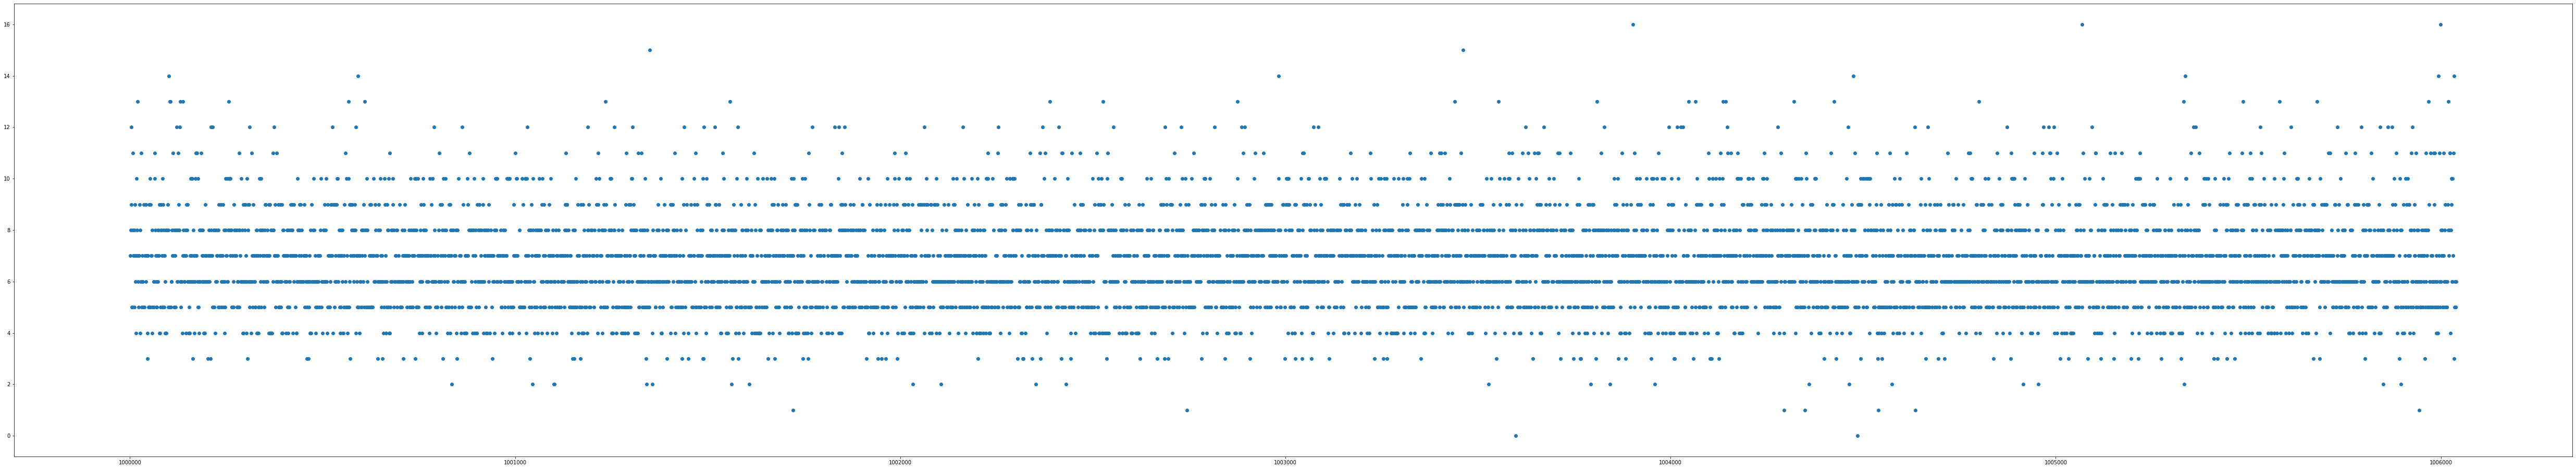

In [113]:
plt.figure(figsize = (88,16))
plt.scatter(dummy_df.User_ID, y = dummy_df.new_avg)